In [1]:
from sklearn.datasets import fetch_openml
import pandas as pd

# MNIST 데이터셋 불러오기
mnist = fetch_openml('mnist_784', version=1)

# 데이터와 레이블 분리
X = mnist.data
y = mnist.target

# 데이터 프레임의 첫 5행 출력
print(X.head())
print(y.head())

   pixel1  pixel2  pixel3  pixel4  pixel5  pixel6  pixel7  pixel8  pixel9  \
0       0       0       0       0       0       0       0       0       0   
1       0       0       0       0       0       0       0       0       0   
2       0       0       0       0       0       0       0       0       0   
3       0       0       0       0       0       0       0       0       0   
4       0       0       0       0       0       0       0       0       0   

   pixel10  ...  pixel775  pixel776  pixel777  pixel778  pixel779  pixel780  \
0        0  ...         0         0         0         0         0         0   
1        0  ...         0         0         0         0         0         0   
2        0  ...         0         0         0         0         0         0   
3        0  ...         0         0         0         0         0         0   
4        0  ...         0         0         0         0         0         0   

   pixel781  pixel782  pixel783  pixel784  
0         0       

In [2]:
from sklearn.preprocessing import StandardScaler

# 데이터 표준화
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [3]:
from sklearn.decomposition import PCA

# PCA 모델 생성
pca = PCA(n_components=0.95)  # 전체 분산의 95%를 설명하는 주성분 선택

# PCA 학습 및 변환
X_pca = pca.fit_transform(X_scaled)

# 변환된 데이터의 크기 확인
print(X_pca.shape)

(70000, 332)


In [6]:
# 선택된 주성분의 수
print(f'선택된 주성분의 수: {pca.n_components_}')

선택된 주성분의 수: 332


In [ ]:
# 각 주성분이 설명하는 분산 비율
print(f'각 주성분이 설명하는 분산 비율: {pca.explained_variance_ratio_}')

각 주성분이 설명하는 분산 비율: [0.05642719 0.04041226 0.03738273 0.02893    0.02520752 0.02192549
 0.01914282 0.01740684 0.01532232 0.01396087 0.01342175 0.01201421
 0.01113962 0.01090582 0.01027986 0.00994955 0.00931255 0.00919635
 0.008886   0.00863195 0.00821741 0.00798417 0.00762573 0.00742315
 0.0071657  0.00689314 0.00681399 0.00654588 0.00627293 0.00610345
 0.00597261 0.00589304 0.00567358 0.00559358 0.00552473 0.00534443
 0.00527593 0.00515841 0.00505498 0.00477438 0.00476312 0.00465155
 0.00453454 0.00445757 0.00442313 0.00437877 0.00437294 0.00427724
 0.00424808 0.00418524 0.00404059 0.00396258 0.00393176 0.00390562
 0.00386444 0.00377501 0.00373883 0.00368328 0.00360377 0.0035637
 0.00349289 0.00344527 0.00343239 0.00341    0.00334463 0.00332107
 0.00329803 0.00319433 0.0031711  0.00315431 0.00309941 0.00305782
 0.00305095 0.0030396  0.00296635 0.00292958 0.00291295 0.00290232
 0.00288608 0.00287022 0.00284514 0.00281524 0.00279245 0.00278629
 0.00278233 0.00276733 0.0027542  0.00272901

In [8]:
# 누적 분산 비율
print(f'누적 분산 비율: {pca.explained_variance_ratio_.cumsum()}')

누적 분산 비율: [0.05642719 0.09683945 0.13422218 0.16315218 0.1883597  0.21028519
 0.22942801 0.24683484 0.26215716 0.27611803 0.28953978 0.30155399
 0.31269361 0.32359943 0.33387928 0.34382883 0.35314139 0.36233773
 0.37122373 0.37985569 0.3880731  0.39605727 0.403683   0.41110615
 0.41827185 0.42516499 0.43197898 0.43852485 0.44479779 0.45090124
 0.45687385 0.46276689 0.46844047 0.47403405 0.47955878 0.48490321
 0.49017915 0.49533756 0.50039254 0.50516692 0.50993004 0.51458159
 0.51911613 0.5235737  0.52799683 0.5323756  0.53674853 0.54102577
 0.54527385 0.54945909 0.55349969 0.55746227 0.56139402 0.56529964
 0.56916408 0.57293908 0.57667791 0.5803612  0.58396497 0.58752866
 0.59102155 0.59446682 0.59789921 0.60130921 0.60465384 0.60797491
 0.61127295 0.61446728 0.61763838 0.62079269 0.62389209 0.62694992
 0.63000087 0.63304047 0.63600682 0.6389364  0.64184935 0.64475167
 0.64763776 0.65050798 0.65335312 0.65616836 0.65896081 0.6617471
 0.66452943 0.66729676 0.67005095 0.67277997 0.675467

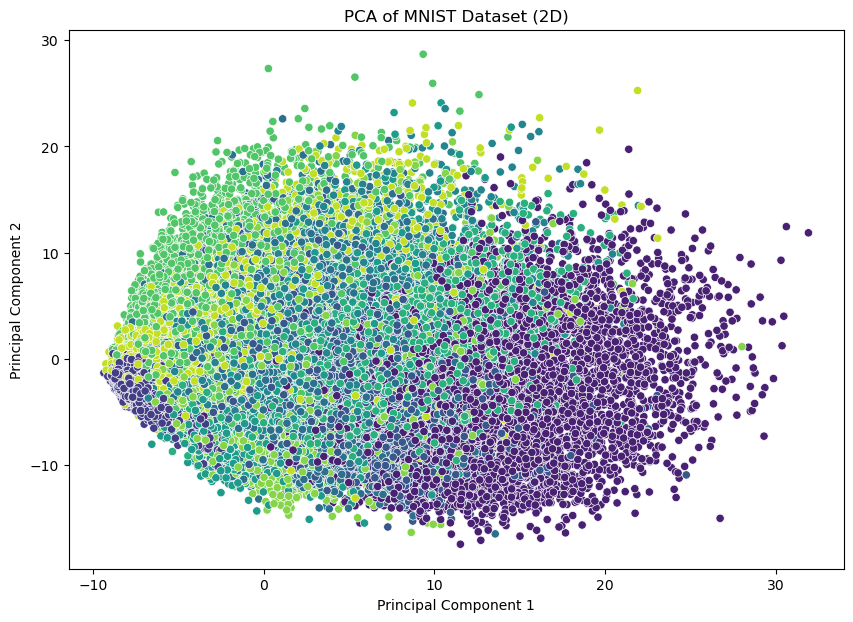

In [9]:
import matplotlib.pyplot as plt
import seaborn as sns

# 2차원 시각화
plt.figure(figsize=(10, 7))
sns.scatterplot(x=X_pca[:, 0], y=X_pca[:, 1], hue=y, palette='viridis', legend=None)
plt.title('PCA of MNIST Dataset (2D)')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.show()